In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

from data.ETFsLoader import ETFsLoader

inputs_path = os.path.join(os.getcwd(), "data", "inputs")

plt.style.use("bmh")

In [2]:
inputs_path

'/Users/danieloliveira/Documents/Daniel/codes/rpowbe/src/data/inputs'

## Raw import data

In [3]:
raw_data = pd.read_csv(os.path.join(inputs_path, "etfs.csv"), sep=";")
raw_data["date"] = pd.to_datetime(raw_data["date"])
raw_data.set_index("date", inplace=True)

In [4]:
raw_data.head()

,SPY,IWM,EEM,TLT,USO,GLD,XLF,XLB,XLK,XLV,...,XLU,XLY,XLP,XLE,VIX,AGG,DBC,HYG,LQD,UUP
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,145.4375,NaN,NaN,NaN,NaN,NaN,18.5749,25.9688,55.4375,30.2969,...,27.4531,30.1250,22.7500,26.5625,24.21,NaN,NaN,NaN,NaN,NaN
2000-01-04,139.7500,NaN,NaN,NaN,NaN,NaN,17.7629,25.7188,52.6250,29.6094,...,26.6250,29.2188,22.1094,26.0625,27.01,NaN,NaN,NaN,NaN,NaN
2000-01-05,140.0000,NaN,NaN,NaN,NaN,NaN,17.6233,26.7813,51.8438,29.3438,...,27.2969,28.8594,22.5000,26.7500,26.41,NaN,NaN,NaN,NaN,NaN
2000-01-06,137.7500,NaN,NaN,NaN,NaN,NaN,18.3973,27.4688,50.1250,29.4375,...,27.2500,29.1875,22.9219,27.7813,25.73,NaN,NaN,NaN,NaN,NaN
2000-01-07,145.7500,NaN,NaN,NaN,NaN,NaN,18.7018,27.4531,51.0000,29.7969,...,27.4844,30.5625,24.3750,28.0781,21.72,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_data.columns

Index(['SPY', 'IWM', 'EEM', 'TLT', 'USO', 'GLD', 'XLF', 'XLB', 'XLK', 'XLV',
       'XLI', 'XLU', 'XLY', 'XLP', 'XLE', 'VIX', 'AGG', 'DBC', 'HYG', 'LQD',
       'UUP'],
      dtype='object')

<Axes: xlabel='date'>

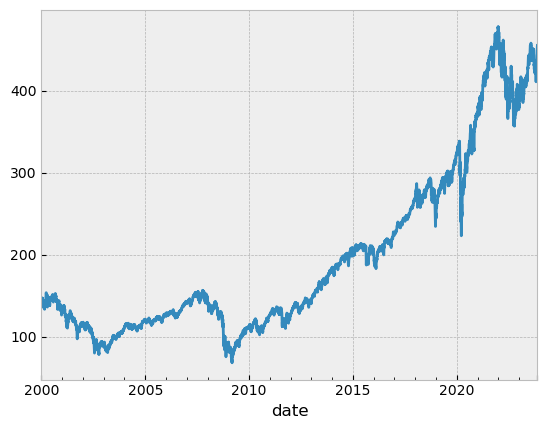

In [6]:
raw_data["SPY"].plot()

In [7]:
resample_freq = "B"

# resample data to business days
resampled_raw_data = raw_data.resample(resample_freq).last()

# fill missing values forward
filled_resampled_raw_data = resampled_raw_data.ffill()

# drop rows with na
filled_resampled_raw_data = filled_resampled_raw_data.dropna()

# compute log-returns
returns_df = np.log(filled_resampled_raw_data).diff().dropna()

<Axes: xlabel='date'>

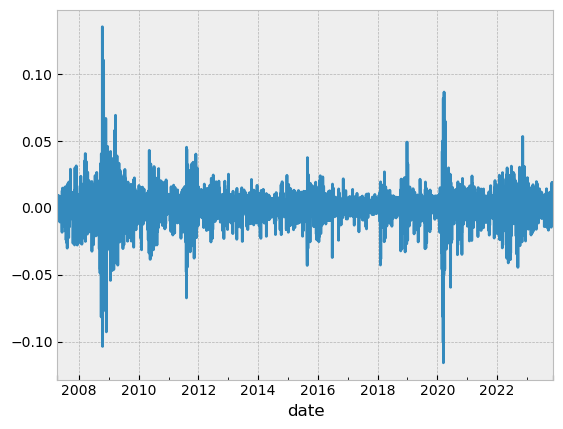

In [8]:
returns_df["SPY"].plot()

## Loader import data

In [9]:
# prepare dataset
loader = ETFsLoader()
returns = loader.returns.T
features = loader.features
features = features.reshape(features.shape[0], features.shape[1] * features.shape[2]).T  

In [10]:
features.shape

torch.Size([4335, 21])

In [11]:
returns.shape

torch.Size([4335, 21])

In [12]:
returns_df.head(3)

,SPY,IWM,EEM,TLT,USO,GLD,XLF,XLB,XLK,XLV,...,XLU,XLY,XLP,XLE,VIX,AGG,DBC,HYG,LQD,UUP
date,,,,,,,,,,,,,,,,,,,,,
2007-04-12,0.004434,0.006702,0.016581,0.000229,0.023309,-0.001343,-0.001686,0.008804,0.010529,0.011231,...,-0.004410,0.006970,0.001112,0.015189,-0.059560,0.001204,0.005886,0.000671,0.001504,-0.005934
2007-04-13,0.004552,0.006903,0.006037,-0.003094,-0.002520,0.012609,0.004210,0.002317,0.000838,0.014499,...,-0.000246,0.000772,0.003328,0.000476,-0.040953,-0.001605,0.005462,-0.001821,-0.001692,-0.000405
2007-04-16,0.009451,0.012817,0.011160,0.005495,-0.006231,0.008221,0.024079,0.013286,0.008337,0.009551,...,0.005877,0.009976,0.002212,0.005851,-0.018197,0.002006,-0.007813,-0.000384,0.000846,-0.004058


In [13]:
returns_df.tail(3)

,SPY,IWM,EEM,TLT,USO,GLD,XLF,XLB,XLK,XLV,...,XLU,XLY,XLP,XLE,VIX,AGG,DBC,HYG,LQD,UUP
date,,,,,,,,,,,,,,,,,,,,,
2023-11-20,0.007668,0.005816,0.012372,0.006090,0.021672,-0.001635,0.003991,0.001743,0.014393,0.006063,...,-0.003055,0.005132,-0.000720,0.001416,-0.028668,0.001574,0.012448,0.001069,0.004015,-0.003076
2023-11-21,-0.002182,-0.012965,-0.006293,-0.000442,0.003176,0.010740,-0.000569,0.003848,-0.008121,0.006027,...,0.002091,-0.002563,0.003020,-0.002243,-0.004484,0.001048,0.005757,0.001335,0.000286,0.001027
2023-11-22,0.003875,0.006251,-0.002022,0.003528,-0.012766,-0.004271,0.003977,0.000619,0.004448,0.004765,...,0.004809,0.003039,0.007153,-0.000473,-0.033514,0.000942,-0.008647,0.001733,0.003998,0.003414


In [14]:
features

tensor([[ 0.0044,  0.0067,  0.0166,  ...,  0.0007,  0.0015, -0.0059],
        [ 0.0046,  0.0069,  0.0060,  ..., -0.0018, -0.0017, -0.0004],
        [ 0.0095,  0.0128,  0.0112,  ..., -0.0004,  0.0008, -0.0041],
        ...,
        [ 0.0077,  0.0058,  0.0124,  ...,  0.0011,  0.0040, -0.0031],
        [-0.0022, -0.0130, -0.0063,  ...,  0.0013,  0.0003,  0.0010],
        [ 0.0039,  0.0063, -0.0020,  ...,  0.0017,  0.0040,  0.0034]])